___

<a href='https://seaborn.pydata.org/'> <img src='https://algorithmclasses.files.wordpress.com/2020/09/seaborn-logo.png?w=420' /></a>
___

# Gráficos de matriz

Los diagramas de matriz permiten trazar datos como matrices codificadas por colores y también se pueden usar para indicar grupos dentro de los datos.

Comencemos por explorar el **mapa de calor** y el **mapa de clima** de seaborn:

In [1]:
import seaborn as sns
%matplotlib inline

In [2]:
flights = sns.load_dataset('flights')

In [3]:
tips = sns.load_dataset('tips')

In [4]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [5]:
flights.head()

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121


## Mapa de calor 

Un mapa de calor contiene valores que representan diferentes tonos del mismo color para cada valor que se trazará. Por lo general, los tonos mas oscuros del grafico representan valores mas altos que los tonos mas claros.

Para que un mapa de calor funcione correctamente, sus datos ya deberían estar en forma de matriz, la función **sns.heatmap** básicamente solo lo colorea por ti. Por ejemplo:

In [6]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


El método **corr()** de Pandas DataFrame se utiliza para calcular la matriz. Por defecto, calcula el coeficiente de correlación de Pearson. También podríamos utilizar otros métodos como el coeficiente de Spearman o el coeficiente de correlación de Kendall Tau pasando un valor apropiado al parámetro “método”

In [12]:
# Formulario de matriz para datos de correlación
correlations = tips[["total_bill", "tip", "size"]].corr()
correlations

,total_bill,tip,size
total_bill,1.000000,0.675734,0.598315
tip,0.675734,1.000000,0.489299
size,0.598315,0.489299,1.000000


<Axes: >

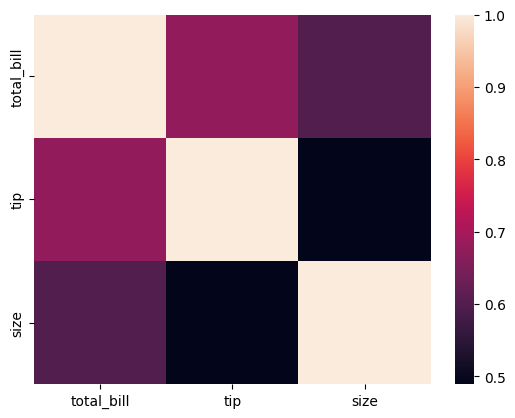

In [13]:
sns.heatmap(correlations)

<Axes: >

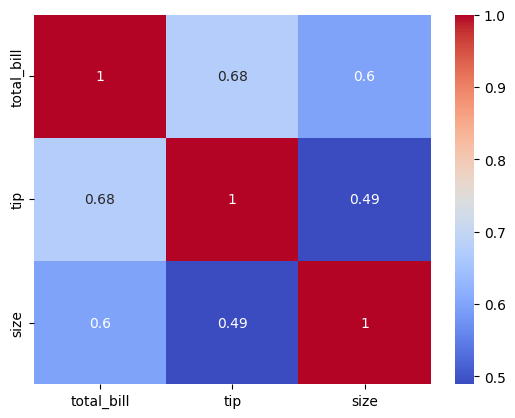

In [16]:
sns.heatmap(correlations, cmap='coolwarm', annot=True)

O para los datos de vuelos:

In [17]:
flights.pivot_table(values='passengers',index='month',columns='year')

year,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960
month,,,,,,,,,,,,
Jan,112,115,145,171,196,204,242,284,315,340,360,417
Feb,118,126,150,180,196,188,233,277,301,318,342,391
Mar,132,141,178,193,236,235,267,317,356,362,406,419
Apr,129,135,163,181,235,227,269,313,348,348,396,461
May,121,125,172,183,229,234,270,318,355,363,420,472
Jun,135,149,178,218,243,264,315,374,422,435,472,535
Jul,148,170,199,230,264,302,364,413,465,491,548,622
Aug,148,170,199,242,272,293,347,405,467,505,559,606
Sep,136,158,184,209,237,259,312,355,404,404,463,508


<Axes: xlabel='year', ylabel='month'>

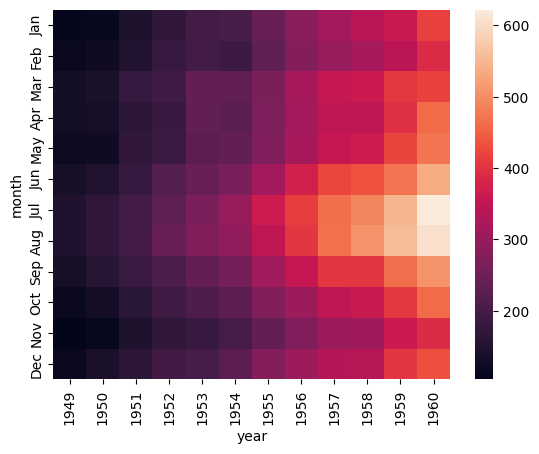

In [18]:
pvflights = flights.pivot_table(values='passengers',index='month',columns='year')
sns.heatmap(pvflights)

<AxesSubplot:xlabel='year', ylabel='month'>

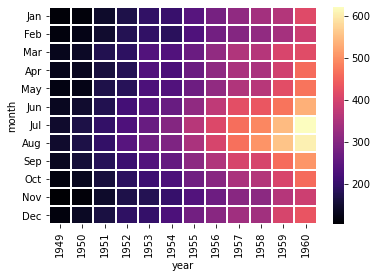

In [ ]:
sns.heatmap(pvflights,cmap='magma',linecolor='white',linewidths=1)

## clustermap

El mapa de clúster utiliza agrupaciones jerárquicas para producir una versión agrupada del mapa de calor. Por ejemplo:

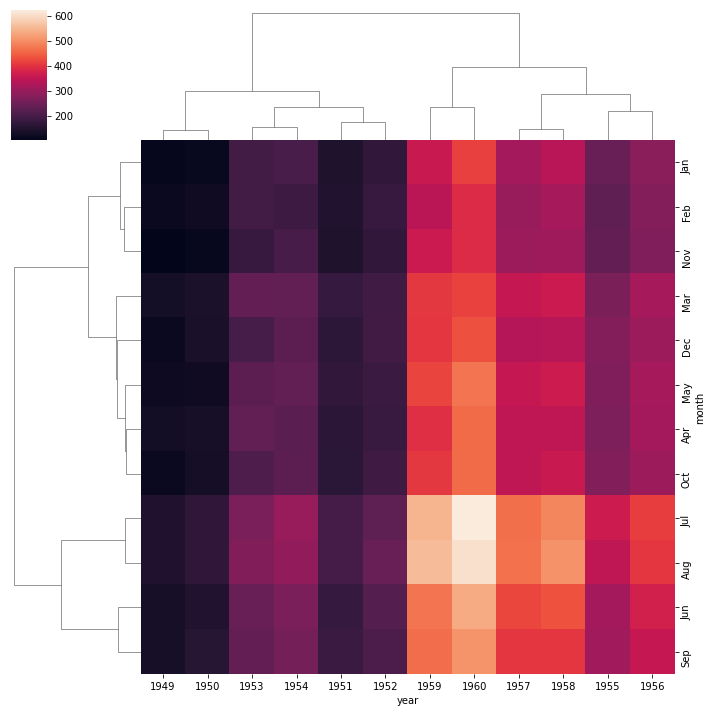

In [ ]:
sns.clustermap(pvflights)

Observa ahora cómo los años y los meses ya no están en orden, sino que están agrupados por similitud en valor (recuento de pasajeros). Eso significa que podemos comenzar a inferir cosas de esta gráfica, como que agosto y julio son similares (tiene sentido, ya que ambos son meses de viajes de verano).

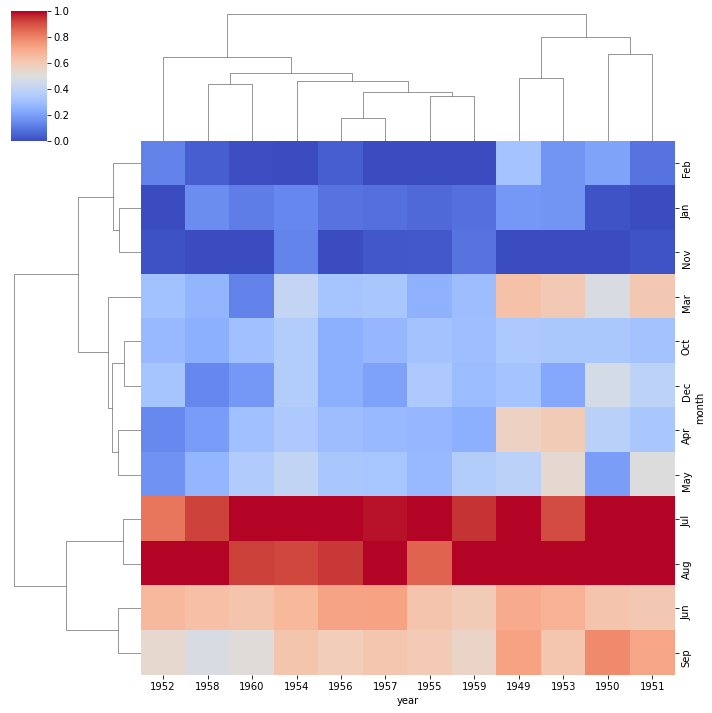

In [ ]:
# Más opciones para obtener la información un poco más clara como la normalización
sns.clustermap(pvflights,cmap='coolwarm',standard_scale=1)

# Gran trabajo!